In [55]:
import pandas as pd
import subprocess
import os
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe

In [56]:
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

sns.set(style="whitegrid")

# DATA PREPARATION

# Johns Hopkins GITHUB csv data

In [57]:
data_path=r'..\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [58]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/15/22,6/16/22,6/17/22,6/18/22,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181236,181465,181534,181574,181666,181725,181808,181912,181987,182033
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276821,276821,277141,277141,277409,277444,277663,277940,278211,278504
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265952,265964,265968,265971,265975,265985,265993,266006,266015,266025
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43449,43449,43449,43449,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [59]:
#Current Data Automation (git_pull)
git_pull = subprocess.Popen( "/usr/bin/git pull" , 
                     cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
                     shell = True, 
                     stdout = subprocess.PIPE, 
                     stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()

In [60]:
time_index=pd_raw.columns[4:]

In [61]:
df_plot = pd.DataFrame({
    'date':time_index})

df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [62]:
#function returns the list of countries
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [63]:
pd_raw[pd_raw['Country/Region']=='Austria'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [64]:
country_list=['Austria',
              'Japan',
              'Ireland',
             ] 

In [65]:
 for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [66]:
df_plot.head()

,date,Austria,Japan,Ireland
0,1/22/20,0,2,0
1,1/23/20,0,2,0
2,1/24/20,0,2,0
3,1/25/20,0,2,0
4,1/26/20,0,4,0


In [67]:
#Dividing each confirmed cases by population of the country
df_plot['Austria'] = df_plot['Austria'].div(8917000)
df_plot['Japan'] = df_plot['Japan'].div(125800000)
df_plot['Ireland'] = df_plot['Ireland'].div(5047438)

Text(0, 0.5, 'Confirmed cases')

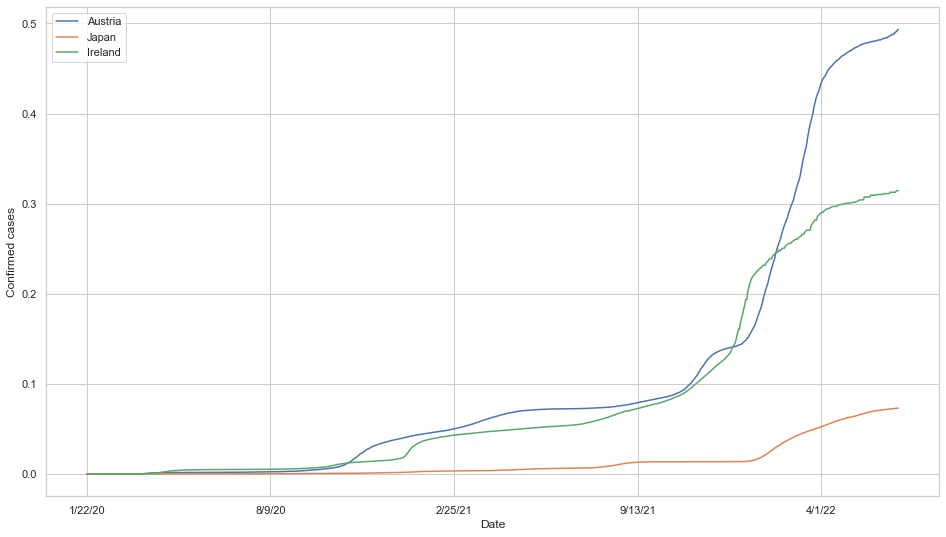

In [68]:
#matplotlib inline

df_plot = df_plot.set_index('date').plot()
df_plot.set_xlabel("Date")
df_plot.set_ylabel("Confirmed cases")